In [1]:
# CELL 1
import os
import matplotlib.pyplot as plt
import matplotlib
import datetime
from scipy import stats
import numpy as np
import pandas as pd

import notebook_utils
    
%matplotlib inline

coin = "btc_usd"
df = notebook_utils.load_time_bars_df(coin, exchange_name="bitmex", bar_size="hourly", use_hdf=True)
df

,symbol,open_date,close_date,close,high,low,volume_usd,pct_change,price_change,pct_change_with_ff,trade_fee,open,strat_signal
index,,,,,,,,,,,,,
2016-01-01 00:06:00+00:00,btc_usd,2016-01-01 00:06:00+00:00,2016-01-01 01:00:00+00:00,431.00,431.00,430.50,2.584198e+03,NaN,NaN,NaN,0.00075,NaN,-0.112500
2016-01-01 01:00:00+00:00,btc_usd,2016-01-01 01:00:00+00:00,2016-01-01 02:00:00+00:00,431.58,431.58,430.41,7.422197e+03,0.001346,1.001346,0.001346,0.00075,431.00,-0.112500
2016-01-01 02:00:00+00:00,btc_usd,2016-01-01 02:00:00+00:00,2016-01-01 03:00:00+00:00,431.58,431.58,430.41,0.000000e+00,0.000000,1.000000,0.000000,0.00075,431.58,-0.112500
2016-01-01 03:00:00+00:00,btc_usd,2016-01-01 03:00:00+00:00,2016-01-01 04:00:00+00:00,431.40,431.58,430.41,9.305298e+03,-0.000417,0.999583,-0.000417,0.00075,431.58,-0.112500
2016-01-01 04:00:00+00:00,btc_usd,2016-01-01 04:00:00+00:00,2016-01-01 05:00:00+00:00,433.60,435.30,431.40,1.224424e+05,0.005100,1.005100,0.005100,0.00075,431.40,-0.112500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 20:00:00+00:00,btc_usd,2019-12-31 20:00:00+00:00,2019-12-31 21:00:00+00:00,7146.00,7162.00,7141.00,2.202026e+07,-0.000140,0.999860,-0.000140,0.00075,7147.00,-0.405775
2019-12-31 21:00:00+00:00,btc_usd,2019-12-31 21:00:00+00:00,2019-12-31 22:00:00+00:00,7156.00,7158.00,7145.50,1.002474e+07,0.001399,1.001399,0.001399,0.00075,7146.00,-0.656864
2019-12-31 22:00:00+00:00,btc_usd,2019-12-31 22:00:00+00:00,2019-12-31 23:00:00+00:00,7176.00,7176.50,7153.00,1.970618e+07,0.002795,1.002795,0.002795,0.00075,7156.00,-0.215198


In [2]:
og_strat_signal = df["strat_signal"].copy()

In [3]:
# CELL 2
# We set the dates for which we want to run our analysis.
start_date = '2018-01-01'
end_date = '2019-05-01'
analysis_options = dict(
    start_date=start_date,
    end_date=end_date,
    bars_per_day=1,
    extra_columns=[],
)

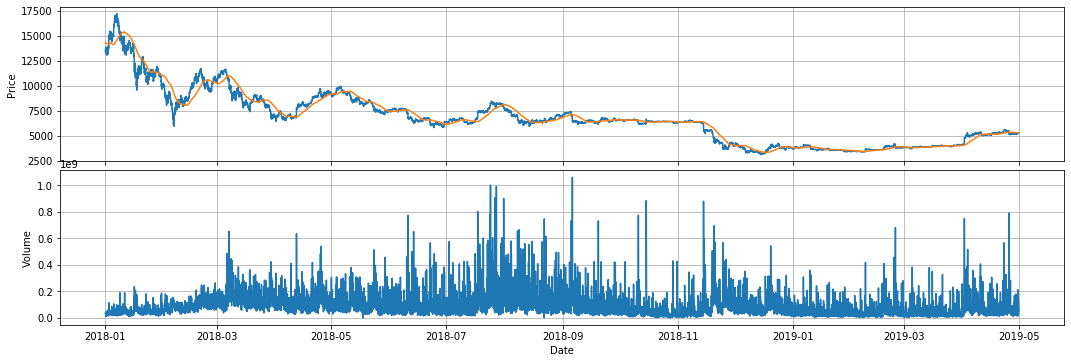

In [4]:
# CELL 3
# This cell shows a way of exploring data

# Compute some data we want to graph
df["mean"] = df['close'].rolling(200).mean()

# Select a subset of the data to graph
graph_df = df[(df.index >= start_date) & (df.index <= end_date)]

# Use our own GraphAssistant utility
ga = notebook_utils.GraphAssistant(10)

# Create a new plot
ga.new_plot()
plt.plot(graph_df["close"])
plt.plot(graph_df["mean"])
plt.ylabel('Price')

# Create a new plot
ga.new_plot()
plt.plot(graph_df["volume_usd"])
plt.ylabel('Volume')

# Show all plots
ga.show()

In [5]:
# CELL 4
# Here are the functions that will compute our strategy signal. Each function takes a dataframe `df`, along with
# more optinal parameters.
# Each function has to set the "strat_signal" column in the `df`. The values will range from -1 to 1, telling us to
# go short (-1), neutral (0), or long (1). Intermediate values are also supported.

def future_info_signal(df):
    # We take a peek at tomorrow's price change to decide what we should do today.
    # Obviously don't do this for real strategies!
    df["strat_signal"] = np.sign(df["pct_change"].shift(-1).fillna(0))
    return df

def constant_signal(df, signal=1):
    df["strat_signal"] = signal
    return df

def mean_crossover_signal(df, mean_days=7):
    # Compute rolling mean of the price
    df["mean"] = df['close'].rolling(mean_days).mean()
    # If close > mean, then the sign will be +1; if close < mean, then the sign will be -1; otherwise it's 0.
    df["strat_signal"] = np.sign(df["close"] - df["mean"])
    return df

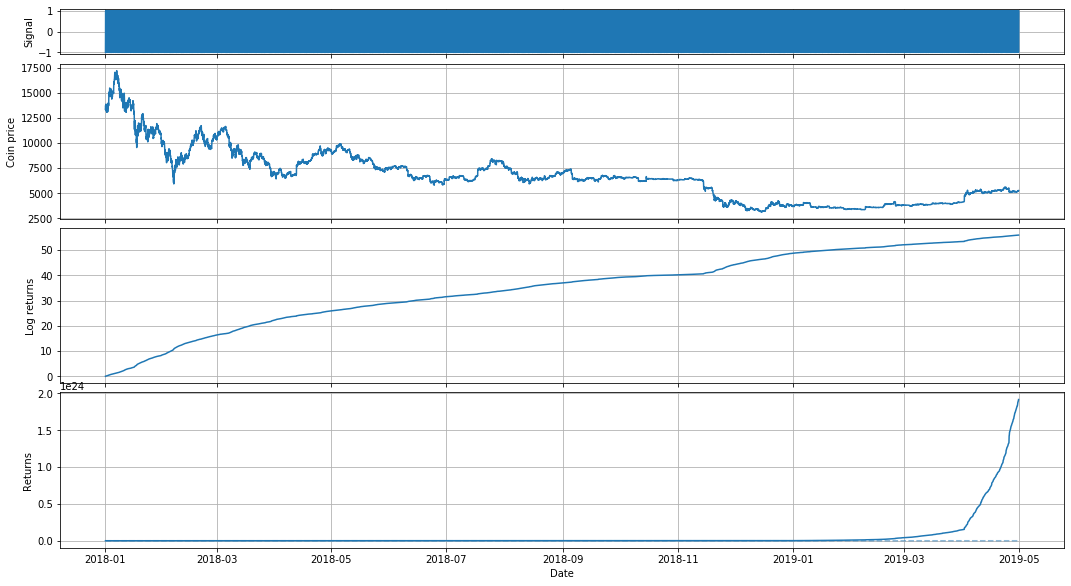

DF filtered 2018-01-01 00:00:00+00:00 to 2019-04-30 23:00:00+00:00
#[]
	Returns: 1.915054361532997e+24
	Returns after fees: 1.3021117821968289e+20
	SR: 59.539765795314054
	SR (after fees): 49.169460266169644
	% bars right: 1.0
	% bars in market: 0.9847079037800688
	Bars count: 11640


In [6]:
# CELL 5
# First we use our signal function to simulate trading.
simulation_result = notebook_utils.simulate(future_info_signal, df)
# We then use the simulation result to: graph it, analyze it, and print the analysis.
# You can do each step independently, but because we will almost always do all three, I'm using the helper function.
analysis_result = notebook_utils.graph_print_analyze_simulation_result(simulation_result, analysis_options)

# A few things to note:
# 1) Signal graph shows `strat_signal`
# 2) Coin price is always graphed.
# 3) Log returns are useful because they are more linear, so it's easier to see how consistently you make money.
#    Note that 
# 4) Normal returns are more humanly understandable. For example, a return of 1.25 means 25% profit.
#    We also graph returns after fees, which for daily trading doesn't affect the results too much.

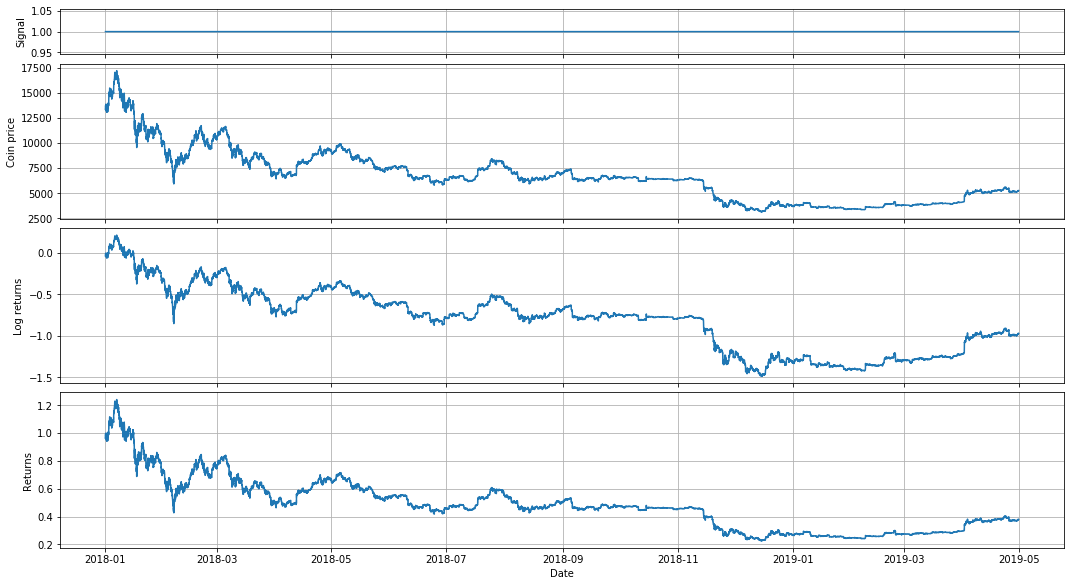

DF filtered 2018-01-01 00:00:00+00:00 to 2019-04-30 23:00:00+00:00
#[1]
	Returns: 0.37944208174150895
	Returns after fees: 0.37944208174150895
	SR: -0.8671113766478579
	SR (after fees): -0.866799852402638
	% bars right: 0.49673539518900345
	% bars in market: 1.0
	Bars count: 11640


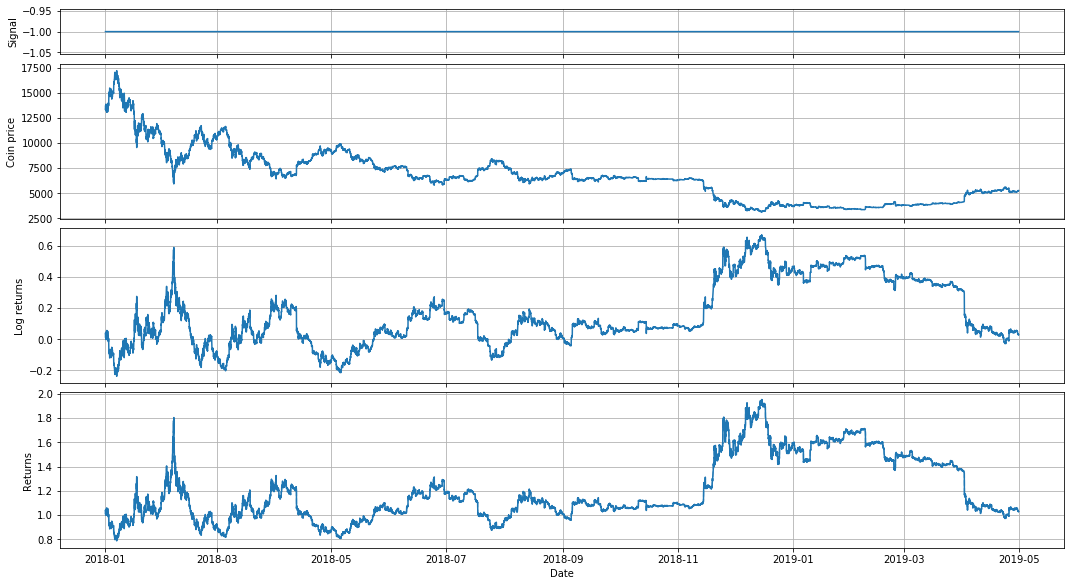

DF filtered 2018-01-01 00:00:00+00:00 to 2019-04-30 23:00:00+00:00
#[-1]
	Returns: 1.0287370909548113
	Returns after fees: 1.0287370909548113
	SR: 0.025352564652870283
	SR (after fees): 0.02534257232173191
	% bars right: 0.4879725085910653
	% bars in market: 1.0
	Bars count: 11640


In [7]:
# CELL 6
simulation_result = notebook_utils.simulate(constant_signal, df, 1)
analysis_result = notebook_utils.graph_print_analyze_simulation_result(simulation_result, analysis_options)
simulation_result = notebook_utils.simulate(constant_signal, df, -1)
analysis_result = notebook_utils.graph_print_analyze_simulation_result(simulation_result, analysis_options)

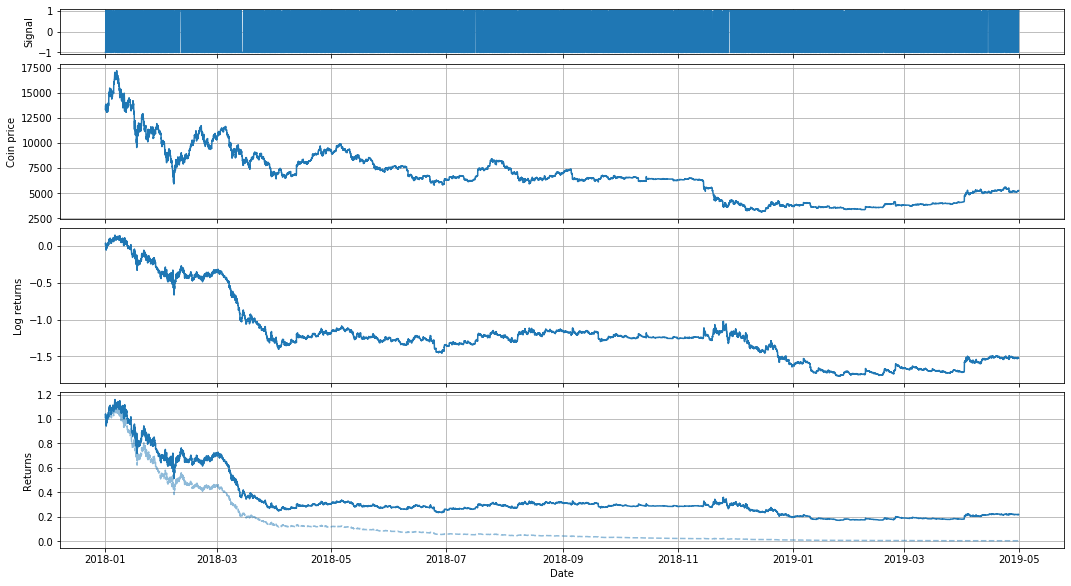

DF filtered 2018-01-01 00:00:00+00:00 to 2019-04-30 23:00:00+00:00
#[7]
	Returns: 0.21824686688102554
	Returns after fees: 0.0034437835920888516
	SR: -1.3620255726287032
	SR (after fees): -4.926188857114641
	% bars right: 0.4402061855670103
	% bars in market: 1.0
	Bars count: 11640


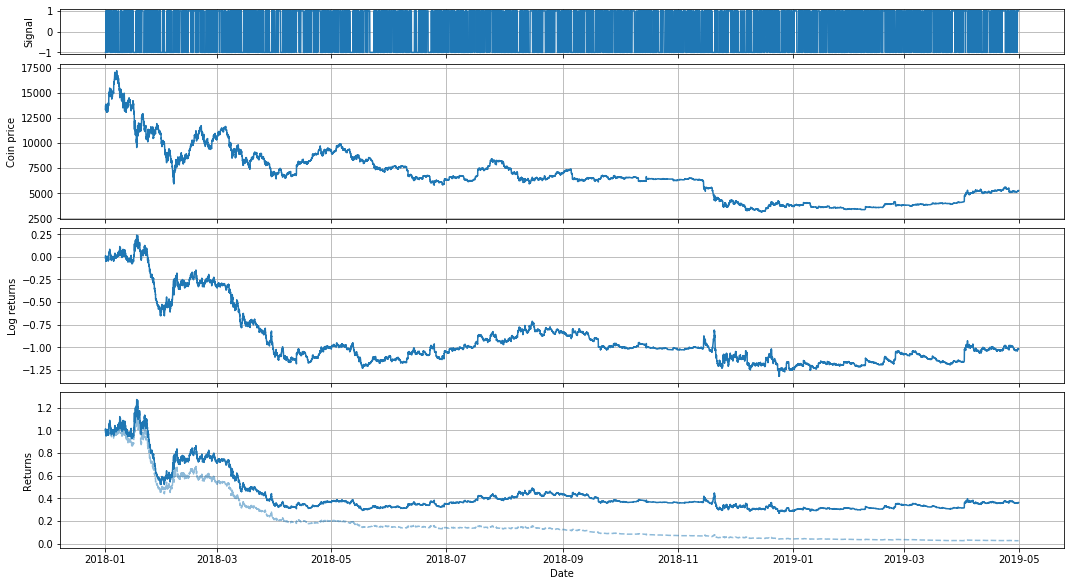

DF filtered 2018-01-01 00:00:00+00:00 to 2019-04-30 23:00:00+00:00
#[14]
	Returns: 0.3623313797293529
	Returns after fees: 0.025180229530051244
	SR: -0.9084002643257097
	SR (after fees): -3.2239688128650497
	% bars right: 0.4554123711340206
	% bars in market: 1.0
	Bars count: 11640


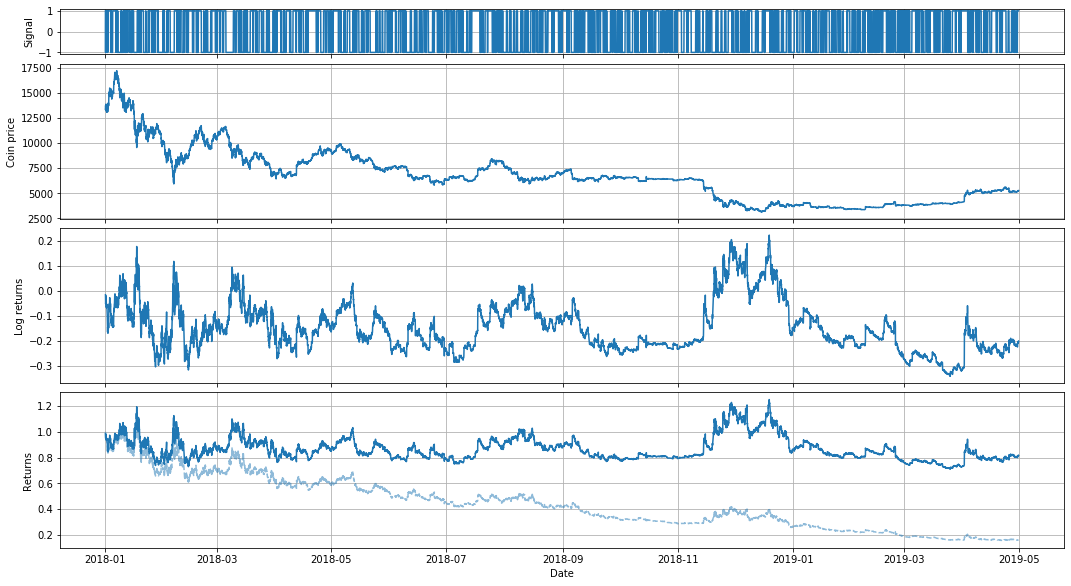

DF filtered 2018-01-01 00:00:00+00:00 to 2019-04-30 23:00:00+00:00
#[30]
	Returns: 0.8174057777611028
	Returns after fees: 0.16069780031768224
	SR: -0.18041423821309235
	SR (after fees): -1.6097945369311013
	% bars right: 0.4718213058419244
	% bars in market: 1.0
	Bars count: 11640


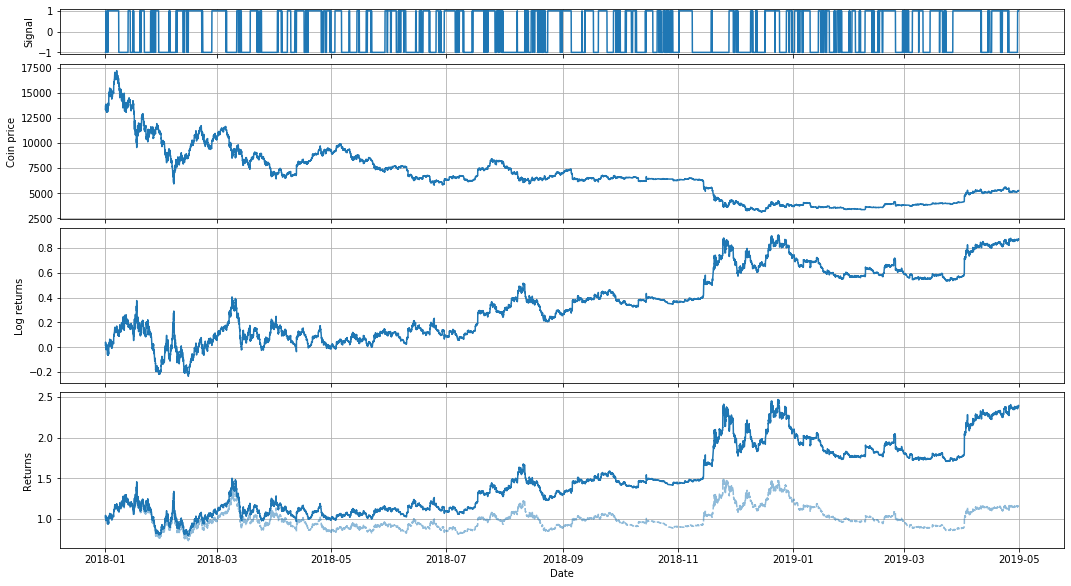

DF filtered 2018-01-01 00:00:00+00:00 to 2019-04-30 23:00:00+00:00
#[100]
	Returns: 2.3929046638240594
	Returns after fees: 1.162691144884107
	SR: 0.7808394265693154
	SR (after fees): 0.13379615141763737
	% bars right: 0.4860824742268041
	% bars in market: 1.0
	Bars count: 11640


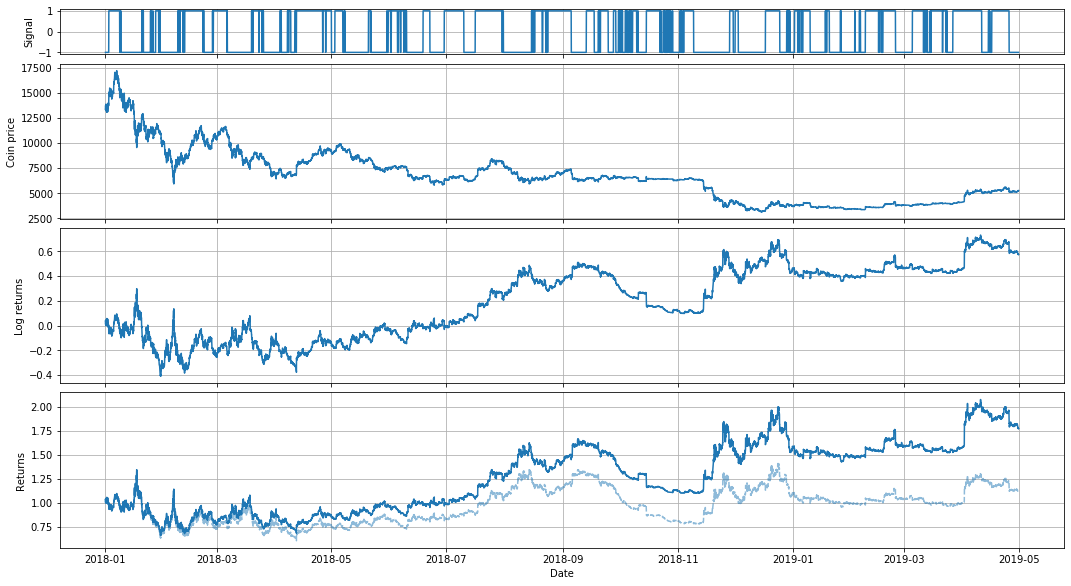

DF filtered 2018-01-01 00:00:00+00:00 to 2019-04-30 23:00:00+00:00
#[200]
	Returns: 1.7751668547069601
	Returns after fees: 1.1115093132304876
	SR: 0.5135759080670858
	SR (after fees): 0.09407340980155576
	% bars right: 0.48599656357388316
	% bars in market: 1.0
	Bars count: 11640


In [8]:
# CELL 7
# mean_crossover_signal takes an optinal paramter `mean_days` that's 7 by default. Here we can try a few values
# for it and see what changes.
for mean_days in [7,14,30,100,200]:
    simulation_result = notebook_utils.simulate(mean_crossover_signal, df, mean_days)
    analysis_result = notebook_utils.graph_print_analyze_simulation_result(simulation_result, analysis_options)
    
# Note that because we're not computing `volume_usd_mean` in `mean_crossover_signal`, it's not graphed,
# but `volume_usd` is still graphed.

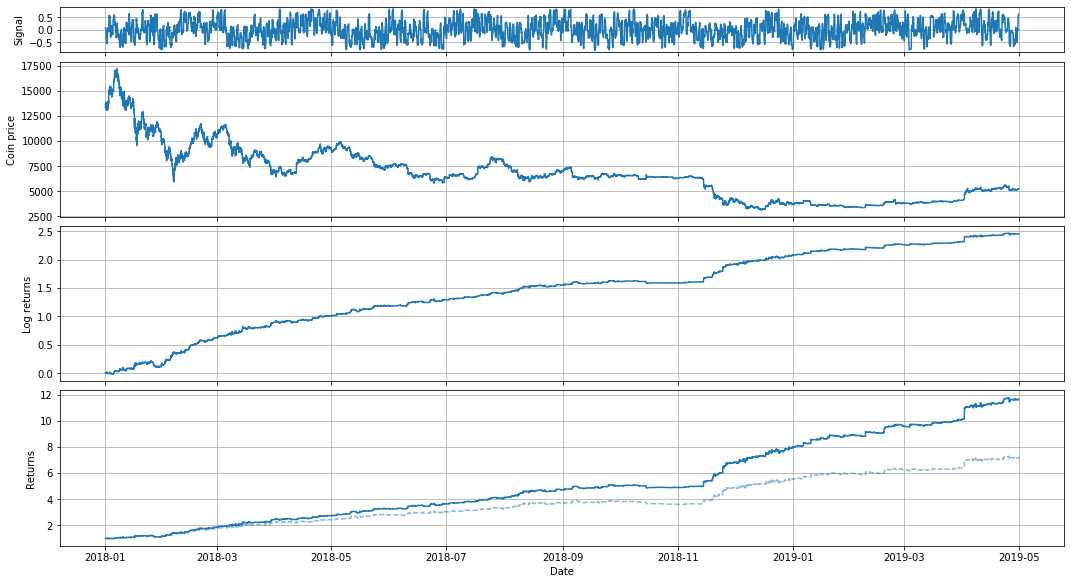

DF filtered 2018-01-01 00:00:00+00:00 to 2019-04-30 23:00:00+00:00
#[]
	Returns: 11.640334780304162
	Returns after fees: 7.17887004104024
	SR: 5.956149554045167
	SR (after fees): 4.785286775441085
	% bars right: 0.5132302405498281
	% bars in market: 1.0
	Bars count: 11640


In [9]:
# CELL 8
def temple_capital_signal(df):
    df['strat_signal'] = og_strat_signal
    return df

simulation_result = notebook_utils.simulate(temple_capital_signal, df)
analysis_result = notebook_utils.graph_print_analyze_simulation_result(simulation_result, analysis_options)